# Introdução ao Risco em Aprendizado de Máquina

A aprendizagem de máquina é, em essência, sobre a construção de modelos a partir de dados. No entanto, como podemos saber se um modelo é 'bom'? E o que realmente significa dizer que um modelo é 'bom'?

É aqui que entram os conceitos de **risco empírico** e **risco estrutural**. Eles nos ajudam a quantificar quão bem nossos modelos estão desempenhando e onde podem estar falhando. Entender esses conceitos não apenas nos ajuda a construir modelos melhores, mas também a compreender os limites fundamentais do que nossos modelos são capazes de aprender a partir de dados.

## Risco Empírico vs. Risco Estrutural

- **Risco Empírico:** Este é o erro que vemos nos nossos dados de treinamento. Ele nos diz quão bem nosso modelo está se ajustando aos dados com os quais foi treinado. É, efetivamente, uma medida do erro de treinamento.

- **Risco Estrutural:** Este é um pouco mais abstrato. Refere-se ao erro que nós esperaríamos ver em novos dados, ou em outras palavras, o erro em um novo conjunto de dados que nosso modelo nunca viu antes. Dá-nos uma ideia da capacidade de generalização do nosso modelo. Em essência, é uma medida do erro de teste ou validação.

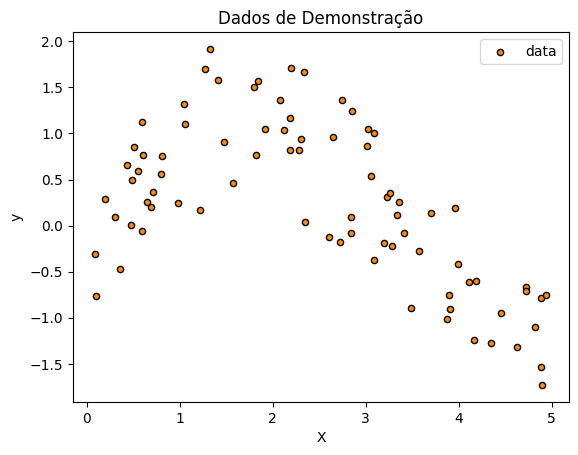

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Definindo a semente aleatória para garantir que os resultados sejam reprodutíveis.
np.random.seed(0)

# Gerando 80 números aleatórios entre 0 e 5.
# np.random.rand(80, 1) cria um array 80x1 de números aleatórios entre 0 e 1.
# Multiplicar por 5 escala esses números para o intervalo [0,5].
# A função np.sort() é usada para ordenar esses números em ordem crescente.
X = np.sort(5 * np.random.rand(80, 1), axis=0)

# Criando a saída 'y' baseada em 'X'.
# np.sin(X) calcula o seno de cada valor em 'X'.
# .ravel() é usado para transformar o array 2D em 1D (achatar o array).
# np.random.normal(0, 0.5, X.shape[0]) adiciona ruído aos dados.
# Esse ruído é gerado de uma distribuição normal com média 0 e desvio padrão 0.5.
# O ruído é adicionado para simular variações reais nos dados e torná-los menos perfeitos.
y = np.sin(X).ravel() + np.random.normal(0, 0.5, X.shape[0])


# Plotando os dados
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Dados de Demonstração")
plt.legend()
plt.show()

In [2]:
# Array de 2 D
X

array([[0.093949  ],
       [0.10109199],
       [0.19593896],
       [0.30112736],
       [0.35518029],
       [0.4356465 ],
       [0.48049204],
       [0.48550638],
       [0.51022405],
       [0.55187571],
       [0.59137213],
       [0.59363859],
       [0.60098281],
       [0.64463149],
       [0.69091476],
       [0.71676644],
       [0.79484792],
       [0.80654759],
       [0.98291181],
       [1.04438378],
       [1.05191281],
       [1.22212796],
       [1.26645801],
       [1.32277806],
       [1.41403481],
       [1.48070099],
       [1.57714175],
       [1.7975395 ],
       [1.81855385],
       [1.84362585],
       [1.91720759],
       [2.0733097 ],
       [2.118274  ],
       [2.18515977],
       [2.18793606],
       [2.19300757],
       [2.28075166],
       [2.30739681],
       [2.33155386],
       [2.34325601],
       [2.60924161],
       [2.6444746 ],
       [2.72441591],
       [2.74406752],
       [2.84022281],
       [2.84216974],
       [2.85098385],
       [3.013

In [3]:
# Array de 1 D
y

array([-0.31276228, -0.76222141,  0.28340069,  0.09570656, -0.46733976,
        0.65338773,  0.00856637,  0.49262898,  0.85291806,  0.58877685,
        1.127201  , -0.05803212,  0.76662417,  0.25849887,  0.20184384,
        0.36752539,  0.55798083,  0.7499851 ,  0.24954087,  1.31502834,
        1.10120461,  0.17170665,  1.69817154,  1.9173454 ,  1.57712784,
        0.90598174,  0.46460356,  1.50162958,  0.76787631,  1.57423485,
        1.04473472,  1.36469433,  1.0320234 ,  1.17042713,  0.82078705,
        1.70552691,  0.82184704,  0.94175122,  1.66588927,  0.0423167 ,
       -0.12768206,  0.96159276, -0.18138076,  1.35894824,  0.0900191 ,
       -0.07875856,  1.24800657,  0.86768576,  1.05087528,  0.53404745,
       -0.37372091,  1.00842225, -0.1919816 ,  0.31346335,  0.34999414,
       -0.21710291,  0.11598067,  0.25108209, -0.07611694, -0.88936787,
       -0.27170555,  0.13648318, -1.0138374 , -0.75586394, -0.90726126,
        0.19551372, -0.41789843, -0.61739075, -1.23785358, -0.59

# Risco Empírico

Quando falamos sobre treinar modelos de aprendizado de máquina, muitas vezes estamos tentando minimizar algum tipo de erro. No contexto de regressão, por exemplo, queremos minimizar a diferença entre as previsões do nosso modelo e os valores reais. Esta diferença é muitas vezes referida como "erro".


## Como é Calculado

Vamos usar uma analogia para tornar isso mais simples. Imagine que você esteja tentando acertar dardos em um alvo. Cada vez que você joga o dardo e erra o centro, você tem um erro - a distância entre onde o dardo acertou e o centro do alvo.

Agora, vamos elevar ao quadrado essa distância. Por que elevar ao quadrado? Porque queremos que os erros maiores tenham um impacto ainda maior. Então, se você errar o alvo por uma pequena distância, terá um pequeno erro quadrático. Mas se errar por uma grande distância, o erro quadrático será muito maior.

O **risco empírico**, então, é a média de todos esses erros quadráticos nos nossos dados de treinamento. É como uma média das "penalidades" por cada erro que nosso modelo comete.

Isso é o que chamamos de Erro Quadrático Médio ou, em inglês, Mean Squared Error (MSE).

Para quem gosta de fórmulas:

### Erro Quadrático Médio (MSE - Mean Squared Error)

Dado um conjunto de observações reais \( y_1, y_2, ..., y_n \) e suas respectivas previsões \( \hat{y}_1, \hat{y}_2, ..., \hat{y}_n \), o MSE é calculado como:

\[ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \]

Onde:
- \( n \) é o número total de observações (ou exemplos).
- \( y_i \) é o valor real da i-ésima observação.
- \( \hat{y}_i \) é o valor previsto pelo modelo para a i-ésima observação.
- \( \sum \) denota a soma de todos os termos.

Em palavras simples:
O MSE é a média dos quadrados das diferenças entre os valores reais e os valores previstos. Ele mede o quanto, em média, as previsões do nosso modelo estão distantes dos valores reais.
"

## Destaque: Referente ao Erro no Conjunto de Treinamento

O risco empírico se refere especificamente ao erro no conjunto de treinamento. É uma estimativa do erro "em amostra", ou seja, é uma medida de quão bem nosso modelo está se ajustando aos dados que já viu. No entanto, um risco empírico baixo não garante que o modelo terá um bom desempenho em dados novos ou não vistos, o que nos leva ao conceito de risco estrutural (que será discutido posteriormente).


3/3 [==============================] - 1s 9ms/step
Risco Empírico (MSE): 0.238


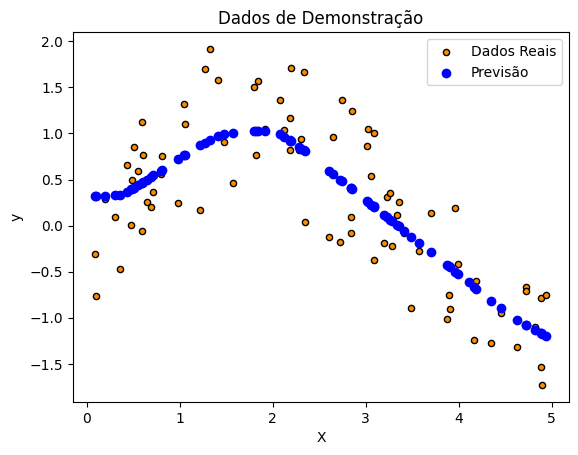

In [4]:
# Criar Modelos
from keras.models import Sequential
from keras.layers import Input, Dense

from sklearn.metrics import mean_squared_error

# Dados fictícios (gerados na seção anterior)
# Aqui, vamos apenas reutilizar o exemplo anterior para calcular o risco empírico

# Treinando um modelo de regressão
model = Sequential()
model.add(Input(shape=(X.shape[1],)))  # Camada de entrada explícita
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))  # Saída linear para regressão

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X, y, epochs=20,verbose=0)
predictions = model.predict(X)

# Calculando o erro quadrático médio (MSE) que é uma representação do risco empírico
mse = mean_squared_error(y, predictions)

print(f"Risco Empírico (MSE): {mse:.3f}")

# Plotando os dados
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="Dados Reais")
plt.scatter(X, predictions, color="blue", label="Previsão")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Dados de Demonstração")
plt.legend()
plt.show()

4/4 [==============================] - 0s 9ms/step
Risco Empírico (MSE): 0.833


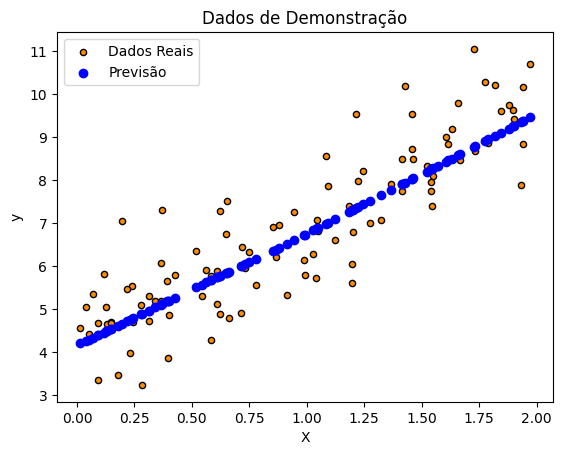

In [5]:
# Gerando dados fictícios
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Treinando o modelo de regressão
model.fit(X, y, epochs=20,verbose=0)
predictions = model.predict(X)

# Calculando o Risco Empírico (erro quadrático médio)
mse = mean_squared_error(y, predictions)
print(f"Risco Empírico (MSE): {mse:.3f}")
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="Dados Reais")
plt.scatter(X, predictions, color="blue", label="Previsão")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Dados de Demonstração")
plt.legend()
plt.show()

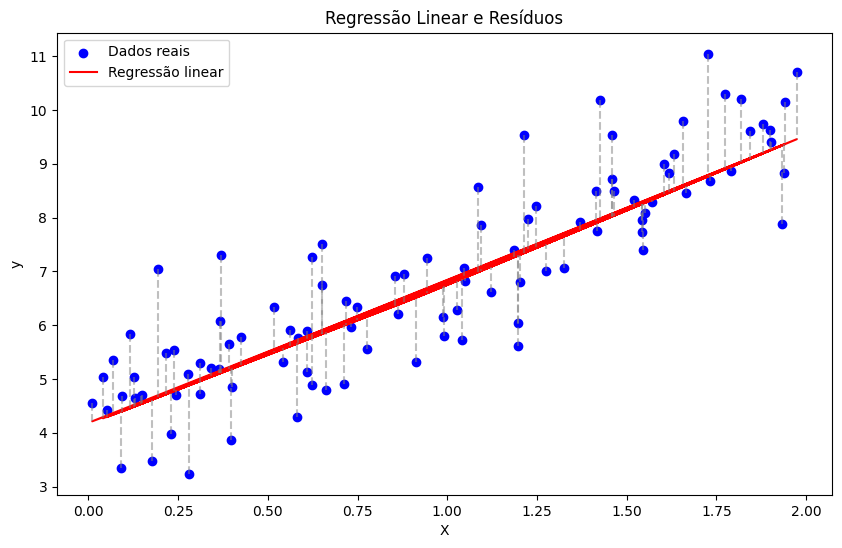

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X, predictions, color='red', label='Regressão linear')
plt.title('Regressão Linear e Resíduos')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Plotando os resíduos
for i in range(len(X)):
    plt.plot([X[i], X[i]], [y[i], predictions[i]], color='gray', linestyle='--', alpha=0.5)

plt.show()


# Overfitting e Underfitting

Quando estamos treinando modelos de aprendizado de máquina, muitas vezes nos encontramos no dilema de quão complexo nosso modelo deve ser. Essa complexidade pode levar a dois cenários opostos, mas problemáticos: **overfitting** e **underfitting**.

## O que são Overfitting e Underfitting?

- **Overfitting (sobreajuste):** Acontece quando o modelo é excessivamente complexo e começa a "decorar" os dados de treinamento em vez de aprender padrões generalizáveis. Um modelo que sofre de overfitting terá um desempenho muito bom (baixo erro) no conjunto de treinamento, mas um desempenho ruim (erro alto) em dados novos ou no conjunto de teste.

- **Underfitting (subajuste):** Ocorre quando o modelo é muito simples para capturar os padrões subjacentes dos dados. Em termos práticos, isso significa que o modelo tem um desempenho ruim tanto no conjunto de treinamento quanto no conjunto de teste.

## Relação com o Risco Empírico

O risco empírico nos dá uma visão do desempenho do nosso modelo no conjunto de treinamento. Portanto:

- Se um modelo apresenta um risco empírico muito baixo (ou erro de treinamento), mas tem um erro alto em um conjunto de validação/teste, é provável que esteja sofrendo de **overfitting**.
  
- Por outro lado, se um modelo tem um risco empírico alto e também tem um alto erro de validação/teste, está provavelmente **underfitting** os dados.

O desafio no aprendizado de máquina é encontrar o equilíbrio certo entre um modelo suficientemente complexo para aprender padrões significativos nos dados, mas não tão complexo que comece a memorizar ruídos ou variações aleatórias no conjunto de treinamento.


## Dropout

**Dropout** é uma técnica de regularização para redes neurais. Ela ajuda a prevenir o overfitting das seguintes maneiras:

- **Desligamento Aleatório**: Durante o treinamento, neurônios específicos são "desligados" aleatoriamente. Isso significa que eles não têm impacto durante uma iteração específica do treinamento.
  
- **Previne Dependências**: Ao desligar neurônios aleatoriamente, a rede evita desenvolver dependências excessivas em qualquer neurônio particular, incentivando a rede a ser mais robusta e a distribuir o aprendizado.

- **Aumenta a Generalização**: Como o modelo não pode confiar em qualquer neurônio específico, ele se torna mais generalizado, reduzindo a chance de overfitting.

- **Camadas Iniciais vs. Camadas Profundas**: Muitas vezes, o dropout é mais benéfico nas camadas mais profundas da rede. As camadas iniciais tendem a aprender características mais gerais e básicas dos dados, enquanto as camadas mais profundas aprendem características mais complexas e específicas. Portanto, desativar aleatoriamente neurônios nas camadas iniciais pode não ser tão eficaz quanto nas camadas mais profundas.

**Taxa de Dropout**: A taxa de dropout também é um hiperparâmetro importante. Uma taxa muito alta pode levar a underfitting, pois muitos neurônios são desligados, enquanto uma taxa muito baixa pode não proporcionar regularização suficiente.

---

## Regularização L1 e L2

Ambas são técnicas de regularização que adicionam uma penalidade ao termo de custo/loss da rede, ajudando a evitar overfitting.

- **L1 (Lasso)**:
  - Adiciona a soma absoluta dos valores dos pesos à função de loss.
  - Pode levar a alguns pesos se tornarem exatamente zero, o que é útil para seleção de características.
  
- **L2 (Ridge)**:
  - Adiciona a soma quadrada dos valores dos pesos à função de loss.
  - Mantém todos os pesos pequenos, distribuindo a influência dos pesos de forma mais uniforme.
  
- **Como ajudam**:
  - Penalizando pesos grandes: Modelos com pesos grandes são complexos e podem ajustar demais aos dados de treinamento. Penalizando esses pesos, incentivamos o modelo a ser mais simples.
  - Distribuição uniforme: Ao distribuir a influência de características/pesos de forma mais uniforme, evitamos que certas características dominem as previsões, levando a um modelo mais generalizável.

- **Escolhendo entre L1 e L2**:
  - Em alguns casos, você pode querer usar apenas L1 ou apenas L2. Se você perceber que seu modelo `tem muitos pesos e suspeita que muitos deles possam ser irrelevantes`, o L1 pode ajudar a induzir esparsidade. Se você apenas quer `penalizar pesos grandes` sem induzir esparsidade, o L2 pode ser mais apropriado.

- **Primeiras vs Últimas Camadas**:
  - A regularização nas primeiras camadas pode afetar mais drasticamente o modelo, uma vez que os erros ali propagarão através da rede. Se você estiver encontrando overfitting, pode começar regularizando as camadas finais e, se necessário, mover-se para as camadas anteriores. Isso permite manter as características mais fundamentais (aprendidas nas primeiras camadas) menos penalizadas.

Risco Empírico do modelo Overfitting (MSE): 0.717
Risco Empírico do modelo Underfitting (MSE): 0.807
Risco Empírico do modelo equilibrado (MSE): 0.772


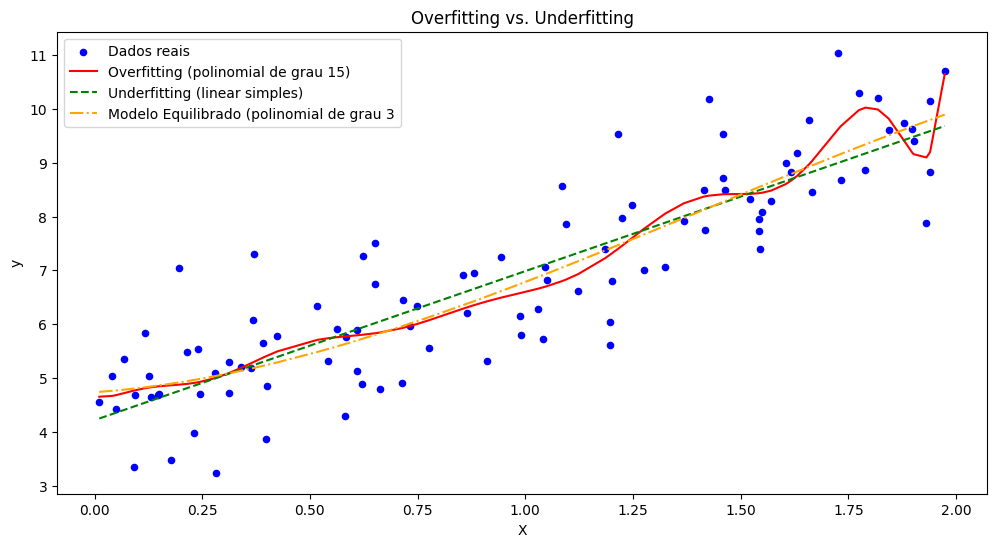

In [7]:
# Importando as bibliotecas necessárias
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Ordenando os dados para que os plots fiquem mais intuitivos
X_sorted = np.sort(X, axis=0)

# Modelo de Overfitting:
# Usamos um modelo polinomial de grau 15 para intencionalmente causar overfitting.
# Isso cria um modelo muito complexo que tentará ajustar todos os pontos dos dados, incluindo o ruído.
overfitting_model = make_pipeline(PolynomialFeatures(15), LinearRegression())
overfitting_model.fit(X, y)
overfitting_predictions = overfitting_model.predict(X_sorted)

# Modelo de Underfitting:
# Usamos um simples modelo de regressão linear.
# Dado que os dados originais são não-lineares, um modelo linear não capturará bem a relação, causando underfitting.
underfitting_model = LinearRegression()
underfitting_model.fit(X, y)
underfitting_predictions = underfitting_model.predict(X_sorted)


# Modelo equilibrado: Polinomial de grau 3
# Um polinômio de grau 3 pode capturar relações não-lineares enquanto evita o superajuste.
balanced_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
balanced_model.fit(X, y)
balanced_predictions = balanced_model.predict(X_sorted)


# Calculamos o Risco Empírico (MSE) para ambos os modelos.
# Isso nos dá uma métrica de desempenho sobre como cada modelo se ajusta aos dados de treinamento.
mse_overfitting = mean_squared_error(y, overfitting_model.predict(X))
mse_underfitting = mean_squared_error(y, underfitting_model.predict(X))
mse_balanced = mean_squared_error(y, balanced_model.predict(X))


# Imprimindo os erros quadráticos médios para ambos os modelos
print(f"Risco Empírico do modelo Overfitting (MSE): {mse_overfitting:.3f}")
print(f"Risco Empírico do modelo Underfitting (MSE): {mse_underfitting:.3f}")
print(f"Risco Empírico do modelo equilibrado (MSE): {mse_balanced:.3f}")


# Plotando os resultados:
# Este gráfico mostrará a diferença entre um modelo que sofre de overfitting,
# um modelo que sofre de underfitting e os dados reais.
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', s=20, label='Dados reais')  # Plotando os dados reais
plt.plot(X_sorted, overfitting_predictions, color='red', label='Overfitting (polinomial de grau 15)')  # Plotando as previsões do modelo overfitting
plt.plot(X_sorted, underfitting_predictions, color='green', linestyle='--', label='Underfitting (linear simples)')  # Plotando as previsões do modelo underfitting
plt.plot(X_sorted, balanced_predictions, color='orange', linestyle='-.', label='Modelo Equilibrado (polinomial de grau 3')  # Plotando as previsões do modelo underfitting
plt.xlabel('X')
plt.ylabel('y')
plt.title('Overfitting vs. Underfitting')
plt.legend()  # Adicionando a legenda ao gráfico
plt.show()  # Mostrando o gráfico


## Modelos Polinomiais de Diferentes Graus

Os modelos polinomiais são uma extensão da regressão linear que visa capturar padrões não-lineares nos dados. Em vez de ajustar apenas uma linha reta (como na regressão linear), os modelos polinomiais tentam ajustar uma curva aos dados.

### O que é um Grau Polinomial?

O grau do polinômio se refere ao maior expoente da variável em uma equação polinomial. Na regressão polinomial, este grau determina a complexidade da curva que o modelo tentará ajustar aos dados.

Por exemplo:
- **Grau 1:** \( y = ax + b \)
  - Isto é apenas regressão linear. Não é uma curva, mas uma linha reta.
- **Grau 2:** \( y = ax^2 + bx + c \)
  - Isto representa uma parábola.
- **Grau 3:** \( y = ax^3 + bx^2 + cx + d \)
  - Uma curva mais complexa que pode ter pontos de inflexão.

### Como o Grau Afeta o Modelo?

- **Modelos de baixo grau (e.g., 1 ou 2)** podem não capturar todos os padrões nos dados, especialmente se a relação entre as variáveis for muito complexa. Isso pode levar a "underfitting", onde o modelo não se ajusta bem nem aos dados de treinamento nem a novos dados.

- **Modelos de grau muito alto** podem se ajustar demais aos dados de treinamento, capturando o ruído e as variações aleatórias nos dados, o que pode levar ao "overfitting". Embora possa parecer excelente no conjunto de treinamento, pode se sair mal em dados novos ou não vistos, porque ele se ajustou muito especificamente aos dados de treinamento.

### Então, Qual Grau Escolher?

Não existe uma resposta única. A escolha do grau depende dos dados e do problema em questão. Normalmente, começamos com um grau baixo e aumentamos gradualmente, avaliando o desempenho do modelo em um conjunto de validação para evitar o overfitting. Ferramentas como validação cruzada podem ser úteis para determinar o grau ideal para um conjunto específico de dados.

# Prática: Visualização de Overfitting e Underfitting

Para entender de forma mais prática o que discutimos anteriormente sobre overfitting e underfitting, vamos realizar uma demonstração usando o mesmo conjunto de dados. Vamos treinar modelos de regressão polinomial com diferentes graus e observar como a complexidade do modelo (aumentando o grau do polinômio) pode levar a diferentes comportamentos.

Neste exercício, vamos:

- Treinar modelos polinomiais de diferentes graus.
- Visualizar como esses modelos se ajustam aos dados.
- Calcular o risco empírico para cada grau do polinômio e identificar onde o modelo pode estar superajustando ou subajustando.


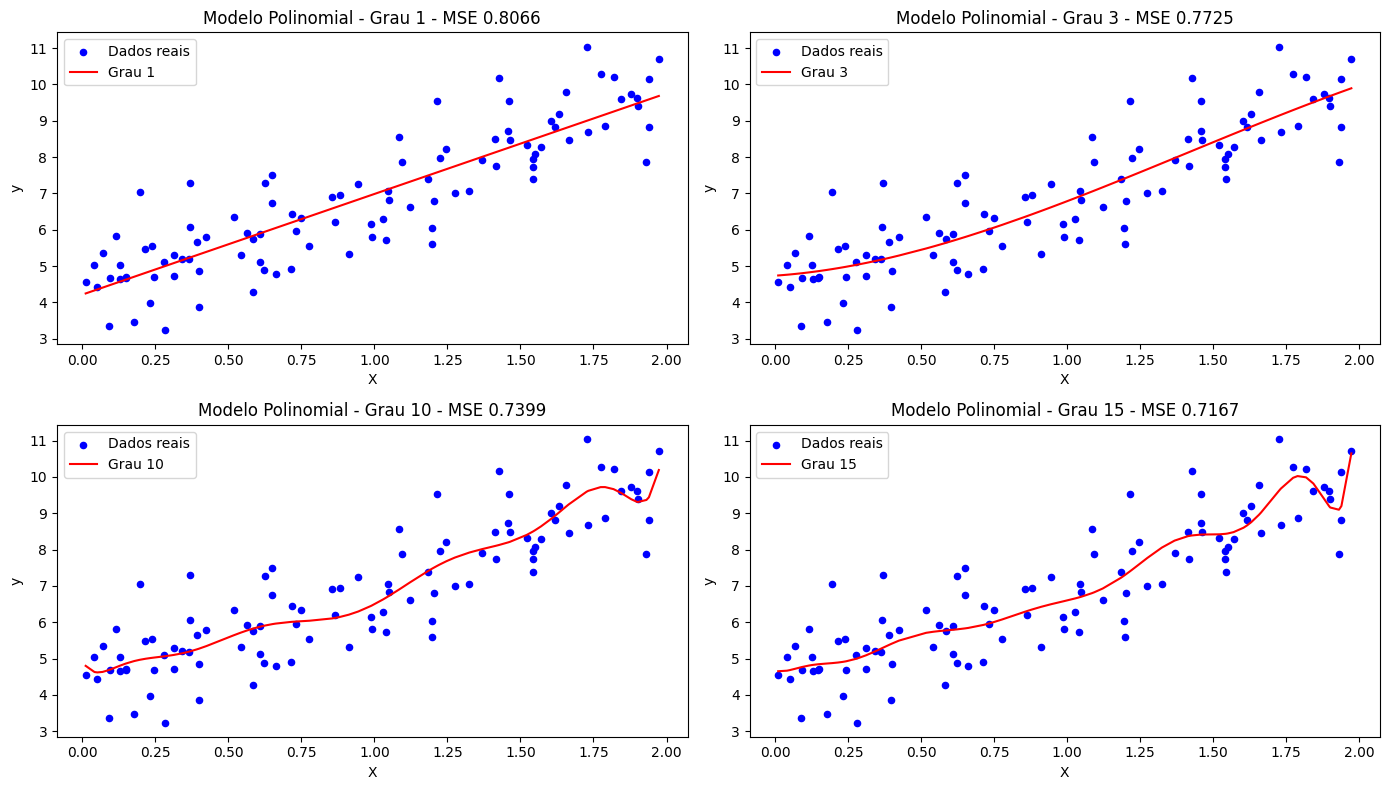

In [8]:
degrees = [1, 3, 10, 15]  # Graus dos polinômios para experimentação
risks = []  # Lista para armazenar o risco empírico para cada grau

plt.figure(figsize=(14, 8))

# Looping para treinar e plotar cada modelo
for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    predictions = model.predict(X_sorted)

    mse = mean_squared_error(y, model.predict(X))
    risks.append(mse)

    plt.subplot(2, 2, i + 1)
    plt.scatter(X, y, color='blue', s=20, label='Dados reais')
    plt.plot(X_sorted, predictions, color='red', label=f'Grau {degree}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Modelo Polinomial - Grau {degree} - MSE {round(mse,4)}')
    plt.legend()

plt.tight_layout()
plt.show()

## Análise dos Resultados
Observando os gráficos acima, podemos identificar claramente os casos de underfitting e overfitting:

**Grau 1 (Linear)**: O modelo é muito simples e não capta a curvatura dos dados, resultando em **underfitting**.

**Grau 3**: Este parece um bom equilíbrio, capturando a tendência dos dados sem se ajustar demais a pequenas variações.

**Grau 10 e 15**: São exemplos claros de **overfitting**. Os modelos estão tentando se ajustar a cada ponto de dado, incluindo o ruído, resultando em curvas irregulares que não representarão bem dados novos.

Vamos verificar o risco empírico para cada grau:

In [9]:
for degree, risk in zip(degrees, risks):
    print(f"Risco Empírico (MSE) para polinômio de grau {degree}: {risk:.3f}")

Risco Empírico (MSE) para polinômio de grau 1: 0.807
Risco Empírico (MSE) para polinômio de grau 3: 0.772
Risco Empírico (MSE) para polinômio de grau 10: 0.740
Risco Empírico (MSE) para polinômio de grau 15: 0.717


# Teoria: Risco Estrutural

O risco estrutural refere-se ao erro que um modelo fará independentemente da amostra de treinamento, ou seja, é intrínseco à arquitetura do modelo escolhido. Para entender melhor, consideremos dois extremos:

1. Um modelo extremamente simples (como uma regressão linear simples para dados que têm uma relação polinomial). Nesse caso, o modelo não terá capacidade suficiente para aprender a verdadeira relação subjacente dos dados. Isso é chamado de **underfitting**.
   
2. Um modelo extremamente complexo (como um polinômio de alto grau para dados simplesmente lineares). Nesse caso, o modelo terá capacidade excessiva, tentando se ajustar a cada ponto de dado, incluindo o ruído. Isso é chamado de **overfitting**.

Ambos os casos refletem o risco estrutural do modelo, que está diretamente relacionado com sua capacidade.

## Risco Empírico vs. Risco Estrutural

Enquanto o **risco empírico** refere-se ao erro do modelo no conjunto de treinamento (como o modelo se ajusta aos dados que já vimos), o **risco estrutural** refere-se ao erro que podemos esperar que o modelo faça em novos dados, devido à sua complexidade ou simplicidade intrínseca.

Em resumo:

- **Risco Empírico**: Erro no conjunto de treinamento.
- **Risco Estrutural**: Erro inerente ao modelo, independentemente do conjunto de treinamento.

# Prática: Demonstração de Risco Estrutural

Uma das maneiras mais eficazes de demonstrar o risco estrutural é mostrando que, mesmo que um modelo tenha um risco empírico baixo (isto é, ele se ajuste bem aos dados de treinamento), ele pode não generalizar bem para novos dados. Esta é uma indicação de que o modelo pode estar superajustando (overfitting) ao conjunto de treinamento.

Nesta seção, usaremos conjuntos de treinamento e teste para demonstrar esse conceito.

In [10]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

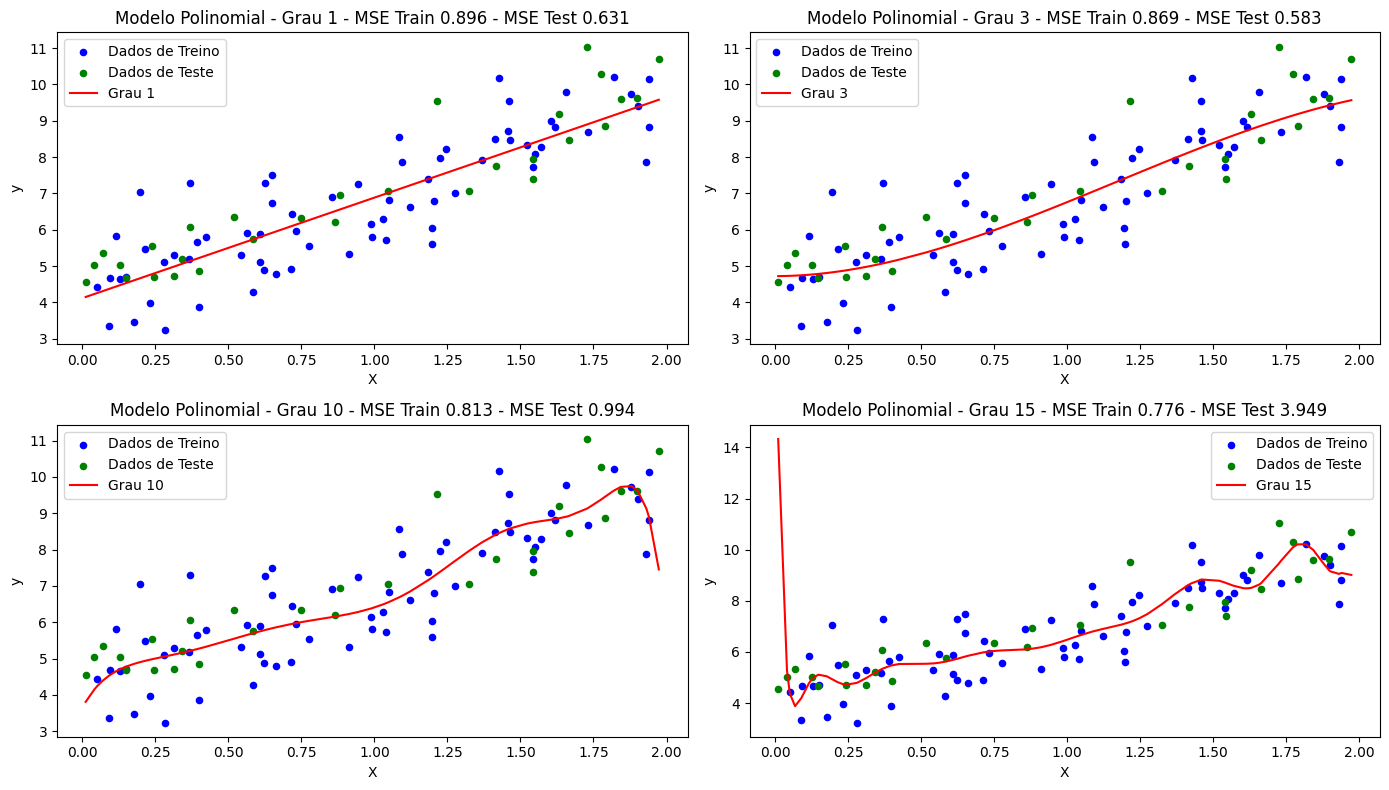

In [11]:
# Lista de diferentes graus polinomiais que queremos testar
degrees = [1, 3, 10, 15]

# Listas para armazenar os erros do modelo em dados de treino e teste
train_errors = []
test_errors = []

# Configurando a figura para a visualização dos resultados
plt.figure(figsize=(14, 8))

# Loop para cada grau polinomial especificado na lista 'degrees'
for i, degree in enumerate(degrees):

    # Criando um modelo polinomial de um certo grau e, em seguida,
    # aplicando regressão linear sobre esses recursos polinomiais
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Treinando o modelo nos dados de treino
    model.fit(X_train, y_train)

    # Fazendo previsões nos dados de treino e teste
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Calculando o erro quadrático médio (MSE) para as previsões de treino e teste
    train_mse = mean_squared_error(y_train, train_predictions)
    test_mse = mean_squared_error(y_test, test_predictions)

    # Adicionando os MSEs calculados às respectivas listas
    train_errors.append(train_mse)
    test_errors.append(test_mse)

    # Configurando um subplot para visualizar o ajuste do modelo aos dados
    plt.subplot(2, 2, i + 1)

    # Plotando os dados de treino e teste
    plt.scatter(X_train, y_train, color='blue', s=20, label='Dados de Treino')
    plt.scatter(X_test, y_test, color='green', s=20, label='Dados de Teste')

    # Plotando as previsões do modelo
    plt.plot(X_sorted, model.predict(X_sorted), color='red', label=f'Grau {degree}')

    # Configurando os rótulos dos eixos e o título do subplot
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Modelo Polinomial - Grau {degree} - MSE Train {round(train_mse,3)} - MSE Test {round(test_mse,3)}')

    # Adicionando a legenda ao subplot
    plt.legend()

# Ajustando a layout da figura para que os subplots não se sobreponham
plt.tight_layout()

# Exibindo a figura completa
plt.show()


### Análise dos Resultados
Conforme aumentamos a complexidade do modelo (aumentando o grau do polinômio), observamos que o modelo começa a se ajustar muito bem ao conjunto de treinamento (risco empírico baixo). No entanto, ao mesmo tempo, o desempenho no conjunto de teste (novos dados) pode começar a piorar. Isso indica um aumento no risco estrutural, onde o modelo não generaliza bem para novos dados.

Vamos verificar os erros de treinamento e teste para cada grau:

In [12]:
for degree, train_error, test_error in zip(degrees, train_errors, test_errors):
    print(f"Grau {degree} - Erro de Treinamento (MSE): {train_error:.3f}, Erro de Teste (MSE): {test_error:.3f}")

Grau 1 - Erro de Treinamento (MSE): 0.896, Erro de Teste (MSE): 0.631
Grau 3 - Erro de Treinamento (MSE): 0.869, Erro de Teste (MSE): 0.583
Grau 10 - Erro de Treinamento (MSE): 0.813, Erro de Teste (MSE): 0.994
Grau 15 - Erro de Treinamento (MSE): 0.776, Erro de Teste (MSE): 3.949


# Conclusão

Ao longo desta aula, exploramos conceitos profundos e essenciais em aprendizado de máquina, particularmente os conceitos de **risco empírico** e **risco estrutural**.


## Revisão dos conceitos

1. **Risco Empírico**: É o erro que observamos no conjunto de treinamento. Mede quão bem nosso modelo ajusta-se aos dados de treino.
2. **Risco Estrutural**: Representa a capacidade do modelo de generalizar para novos dados. Ele nos dá uma noção de quão bem um modelo performará em dados não vistos.
3. **Overfitting**: Quando um modelo é excessivamente complexo e ajusta-se muito bem aos dados de treinamento, capturando até mesmo o ruído, mas falha em generalizar para novos dados.
4. **Underfitting**: Quando um modelo é muito simples e não consegue capturar as tendências subjacentes dos dados, resultando em performance ruim tanto no treinamento quanto em dados não vistos.
5. **Dropout**: Técnica de regularização para redes neurais que "desliga" aleatoriamente neurônios durante o treinamento. Ajuda a evitar overfitting ao forçar representações mais robustas dos dados.
6. **Regularização L1 (Lasso)**: Adiciona penalidade proporcional ao valor absoluto dos coeficientes. Pode zerar alguns coeficientes, ajudando na seleção de características relevantes.
7. **Regularização L2 (Ridge)**: Penaliza coeficientes com base no seu quadrado. Mantém coeficientes pequenos, distribuídos suavemente, ideal quando todos os recursos são relevantes.


Entender os conceitos de risco empírico e estrutural é crucial para desenvolver modelos robustos e eficientes em aprendizado de máquina. Não se trata apenas de construir um modelo que performa bem nos dados de treinamento, mas que também seja capaz de generalizar bem para novos dados.

# Exercício
- A base de dados notebooks já está com todos os valores numéricos;
- A base possui o valor como sendo a classe alvo;
- A base possui 3 colunas com valores aleatórios para atrapalhar a previsão dos modelos.

In [13]:
import pandas as pd

df = pd.read_csv('notebooks.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   marca              10000 non-null  int64
 1   ano                10000 non-null  int64
 2   qtd_nucleos        10000 non-null  int64
 3   qtd_threads        10000 non-null  int64
 4   ram                10000 non-null  int64
 5   gpu_dedicada       10000 non-null  int64
 6   ram_gpu            10000 non-null  int64
 7   entradas_usb       10000 non-null  int64
 8   duracao_bateria    10000 non-null  int64
 9   resolucao_tela     10000 non-null  int64
 10  tipo_tela          10000 non-null  int64
 11  tela_touch         10000 non-null  int64
 12  armazenamento_hdd  10000 non-null  int64
 13  armazenamento_ssd  10000 non-null  int64
 14  aleatoria_1        10000 non-null  int64
 15  aleatoria_2        10000 non-null  int64
 16  aleatoria_3        10000 non-null  int64
 17  valor        

Vamos aprender mais conceitos importandes...

A normalização dos dados não deve ser feita da forma que estávamos fazendo rsrs (Separa os dados em X e y, normaliza X e Y e separa em treinamento validação e teste).

A normalização deve seguir os passos:
- 1° Separar os dados em X e y;
- 2° Separar os dados em treinamento, validação e teste (ou treinamento e teste);
- 3° Normalizar X e y de treinamento (Usar o fit_transform);
- 4° Normalizar X e y de validação e teste (usar apenas o transform);

**Razão**: Queremos calcular a média e o desvio padrão (ou máximos e mínimos, dependendo do escalonador) usando apenas os dados de treinamento. Isto é crucial porque, na prática, não teremos acesso aos dados futuros (dados de teste), então nosso modelo deve ser construído e ajustado apenas com base nos dados de treinamento.

Em contraste, se você normalizasse todo o conjunto de dados antes de dividir em treinamento/teste, estaria vazando informações dos dados de teste para o conjunto de treinamento. Em outras palavras, você estaria usando a média e o desvio padrão (ou outros parâmetros) de todo o conjunto de dados, o que não é representativo de uma situação real e pode levar a um desempenho superestimado.

**Motivo para termos aprendido errado**: Na introdução à modelagem e pré-processamento de dados, muitas vezes, simplificamos os procedimentos para facilitar o entendimento dos conceitos fundamentais. Ao normalizar X e y antes de dividir os dados em conjuntos de treinamento, validação e teste, o processo pode parecer mais linear e menos intimidante para os iniciantes, pois concentra-se primeiro na transformação dos dados e, em seguida, em sua divisão. Isso ajuda a introduzir as ideias de normalização e divisão de dados sem sobrecarregar os alunos com muitos detalhes simultaneamente.

No entanto, à medida que avançamos e nos aprofundamos nas nuances da modelagem de dados, é crucial entender e adotar práticas mais robustas e realistas. Assim, passamos a enfatizar a importância de dividir os dados primeiro e depois aplicar transformações, para evitar vazamento de informações e para simular com precisão cenários do mundo real em que os modelos são aplicados a novos dados não vistos.

OBS: Nunca achei uma literatura sobre isto, mas a prática que uso é:
- 1° Separar os dados em X e y;
- 2° Separar os dados em treinamento e temporários (são os X_temp e y_temp que serão utilizados para separar os dados de validação e teste);
- 3° Normalizar X e y de treinamento (Usar o fit_transform);
- 4° Normalizar X_temp e y_temp de validação e teste (usar apenas o transform);
- 5° Separar X e y de validação e teste.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Forma que faço

In [16]:
# Define as instâncias dos escalonizadonres
scaler_features = MinMaxScaler()
scaler_target  = MinMaxScaler()

# Separa os dados em X e y
X = df.drop('valor', axis = 1)
y = df[['valor']]

# Separa os dados em X e y de treinamento e temporários
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Normaliza e ajusta o escalonizador com os dados de X de treinamento
X_train = scaler_features.fit_transform(X_train)
# Normaliza e ajusta o escalonizador com os dados de y de treinamento
y_train = scaler_target.fit_transform(y_train)

# Ajusta os dados de X_temp
X_temp = scaler_features.transform(X_temp)
# Ajusta os dados de y_temp
y_temp = scaler_target.transform(y_temp)

# Separa os dados em X e y de validação e teste
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Forma das literaturas

In [17]:
# Define as instâncias dos escalonizadonres
scaler_features = MinMaxScaler()
scaler_target  = MinMaxScaler()

# Separa os dados em X e y
X = df.drop('valor', axis = 1)
y = df[['valor']]

# Separa os dados em X e y de treinamento e temporários
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Normaliza e ajusta o escalonizador com os dados de X de treinamento
X_train = scaler_features.fit_transform(X_train)
# Normaliza e ajusta o escalonizador com os dados de y de treinamento
y_train = scaler_target.fit_transform(y_train)

# Separa os dados em X e y de validação e teste
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Ajusta os dados de X_val
X_val = scaler_features.transform(X_val)
# Ajusta os dados de y_val
y_val = scaler_target.transform(y_val)

# Ajusta os dados de X_test
X_test = scaler_features.transform(X_test)
# Ajusta os dados de y_test
y_test = scaler_target.transform(y_test)